# **Project Name**    - Aerial Object Detection and Classification

##### **Project Type**    -   Deep Learning, Streamlit
##### **Name**  - Gade Pavan Kumar Reddy

# **Project Summary -**

This project aims to solve a simple but important problem: telling whether an object in the sky is a bird or a drone. With drones becoming common and birds always sharing the same airspace, airports, security forces, and wildlife teams need quick and reliable identification to prevent accidents and safety issues.

To build this solution, deep learning models were trained on aerial images of birds and drones. We experimented with different approaches including a Custom CNN and advanced pre-trained models like ResNet50, MobileNetV2, and EfficientNetB0. After testing all models, MobileNetV2 stood out with 96% accuracy, showing that it can correctly recognize aerial objects in most situations.

To make the system more realistic, YOLOv8 was added for object detection, allowing the model not only to identify but also locate birds or drones in an image. Finally, a Streamlit app was created so anyone can upload an image and get instant results.

Overall, this project proves that AI can support safer skies and smarter surveillance with fast, accurate, and practical aerial object detection.

# **GitHub Link -**

https://github.com/pavangade31/Aerial-Object-Classification-and-Detection-Project/tree/main

# **Problem Statement**

With the growing use of drones and the natural presence of birds in the sky, identifying what is flying above has become important for safety and security. In places like airports, wildlife zones, and restricted airspace, confusing a drone with a bird can lead to serious issues such as security threats or bird-strike accidents. This project aims to build an intelligent deep learning system that can look at aerial images and accurately classify whether the object is a Bird or a Drone. Optionally, the system can also detect and locate these objects in real time using YOLOv8. The final solution will be deployed through a user-friendly Streamlit application, helping in surveillance, wildlife monitoring, and environment research where quick and correct identification matters the most.

## Step 1: Imports & Configuration

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from pathlib import Path
from PIL import Image
import seaborn as sns
from ultralytics import YOLO
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Data Preprocessing

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/test/bird/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg')

array([[[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       ...,

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]]], dtype=uint8)
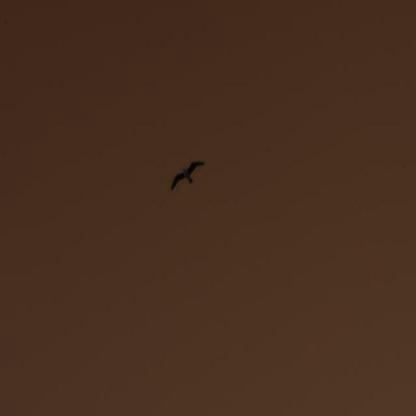

In [ ]:
img

### 1.Horizontal Flipping

array([[[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       ...,

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]],

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]],

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]]], dtype=uint8)
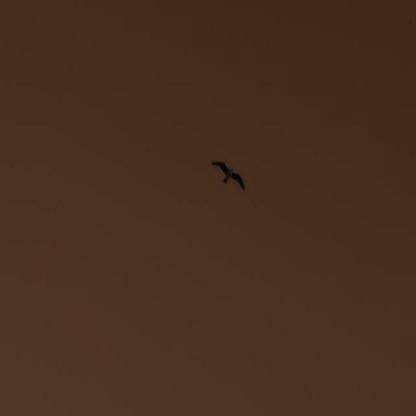

In [ ]:
#Horizontal Flipping
cv2.flip(img,1)

### 2.Vertical Flipping

array([[[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       ...,

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]]], dtype=uint8)
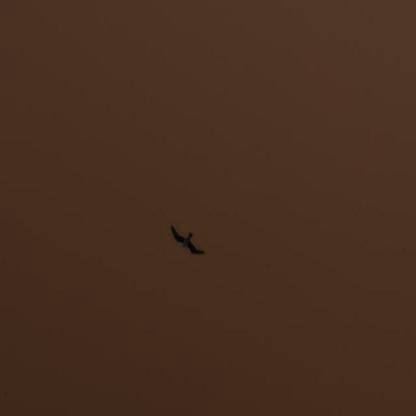

In [ ]:
#Vertical Flipping
cv2.flip(img,0)

### 3.Rotating Image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
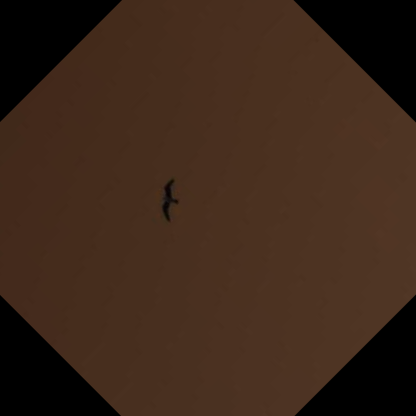

In [ ]:
#Rotating Image
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0) # 45 degrees, 1.0 scale
rotated_image = cv2.warpAffine(img, M, (w, h))
rotated_image

### 4.Zoomed Image

array([[[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       [[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       [[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       ...,

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]]], dtype=uint8)
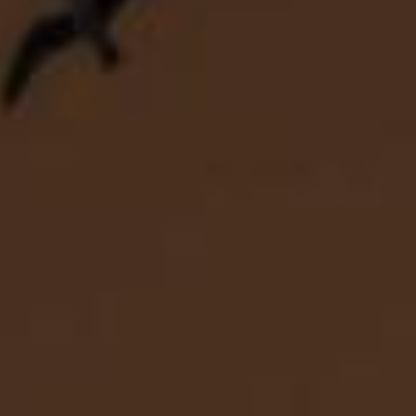

In [ ]:
M = cv2.getRotationMatrix2D(center, 0, 5.5) # 0 degrees, 5.5 scale
zoomed_image = cv2.warpAffine(img, M, (w, h))
zoomed_image

### 5.Changing Brightness

array([[[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       [[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       [[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       ...,

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]],

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]],

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]]], dtype=uint8)
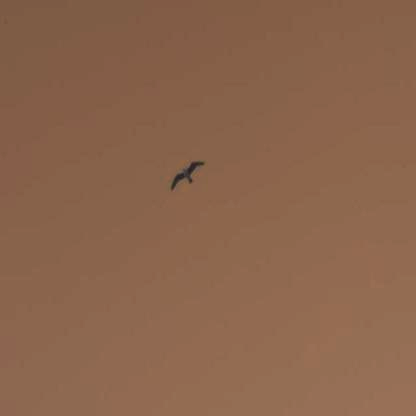

In [ ]:
#Brightness
alpha = 1.5  # Contrast control range(1.0-3.0)
beta = 30    # Brightness control range(0-100)
adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
adjusted_image

### 6.Cropping Image

array([[[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       ...,

       [[73, 47, 31],
        [73, 47, 31],
        [73, 47, 31],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]]], dtype=uint8)
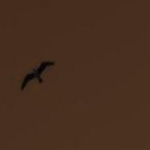

In [ ]:
#image Cropping
img[100:250, 150:300]

### 7.Resizing Image

array([[[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       ...,

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]]], dtype=uint8)
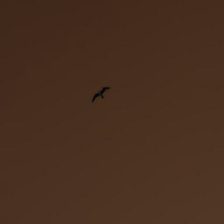

In [ ]:
#resizing to (224,224)
cv2.resize(img, (224, 224))

## Step 3: Training Custom CNN Model

In [ ]:
train_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/train"
val_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/valid"
test_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/test"

In [ ]:
img_size = (160, 160)
batch_size = 64

train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.


## Step 4: Data Normalization

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data   = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data  = test_data.map(lambda x, y: (normalization_layer(x), y))

train_data = train_data.cache().shuffle(500).prefetch(tf.data.AUTOTUNE)
val_data   = val_data.cache().prefetch(tf.data.AUTOTUNE)
test_data  = test_data.cache().prefetch(tf.data.AUTOTUNE)

# ============================
# Data Augmentation (GPU based)
# ============================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
model = models.Sequential([
    layers.Input(shape=(160, 160, 3)),
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Defining Early Stopping

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "Custom_model.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

## Step 6: Training the Model

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5402 - loss: 0.7501 - precision: 0.4909 - recall: 0.3934
Epoch 1: val_loss improved from inf to 0.55478, saving model to Custom_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.5416 - loss: 0.7484 - precision: 0.4932 - recall: 0.3959 - val_accuracy: 0.7104 - val_loss: 0.5548 - val_precision: 0.7680 - val_recall: 0.6178
Epoch 2/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7353 - loss: 0.5382 - precision: 0.7544 - recall: 0.6318
Epoch 2: val_loss did not improve from 0.55478
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7345 - loss: 0.5388 - precision: 0.7534 - recall: 0.6316 - val_accuracy: 0.6222 - val_loss: 0.7442 - val_precision: 0.5780 - val_recall: 0.9556
Epoch 3/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7269 - loss: 0.5247 - precision: 0.7196 - recall: 0.6727
Epoch 3: val_loss did not improve from 0.55478
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7275 -

- Best validation loss was 0.55478
- Trying to Improve my model by using Dropout layers, BatchNormalization

## Step 7: Custom Model Improvement

In [ ]:
model = models.Sequential([

   # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(160,160,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,397,537 (51.11 MB)

 Trainable params: 13,396,129 (51.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.6994 - loss: 0.9208 - precision_1: 0.6961 - recall_1: 0.6544
Epoch 1: val_loss did not improve from 0.55478
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 816ms/step - accuracy: 0.7003 - loss: 0.9160 - precision_1: 0.6970 - recall_1: 0.6553 - val_accuracy: 0.4910 - val_loss: 1.0169 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8117 - loss: 0.4169 - precision_1: 0.8286 - recall_1: 0.7585
Epoch 2: val_loss did not improve from 0.55478
42/42 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - accuracy: 0.8120 - loss: 0.4166 - precision_1: 0.8285 - recall_1: 0.7591 - val_accuracy: 0.5090 - val_loss: 7.7008 - val_precision_1: 0.5090 - val_recall_1: 1.0000
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8456 - loss: 0.3610 - precision_1: 0.8384 - recall_1: 0.8325
Epoch 3: val_loss did not improve from 0.55478
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.845



*   No Improvemnt in val_loss



In [ ]:
best_model = keras.models.load_model("Custom_model.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7196 - loss: 0.5667 - precision: 0.7561 - recall: 0.5892
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7183 - loss: 0.5514 - precision: 0.7938 - recall: 0.6233
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.7731 - loss: 0.5204 - precision: 0.8259 - recall: 0.6189
Train Accuracy: 0.7216378450393677
Train Precision: 0.7497537136077881
Train Recall: 0.6097756624221802
Train F1 Score: 0.6725585712663569
Train Loss: 0.566085934638977
                                     
Val Accuracy: 0.7104072570800781
Val Precision: 0.7679557800292969
Val Recall: 0.6177777647972107
Val F1 Score: 0.6847290476885945
Val Loss: 0.5547763109207153
                                     
Test Accuracy: 0.7674418687820435
Test Precision: 0.7972972989082336
Test Recall: 0.6276595592498779
Test F1 Score: 0.702380943477424
Test Loss: 0.5246917009353638


## Step 8: Transfer Learning Models

### 1.MobileNetV2

In [ ]:
# Loading Pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Freezing weights

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,713 (9.26 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 2,260,800 (8.62 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "MobileNetV2.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.6243 - loss: 0.7669 - precision_2: 0.5804 - recall_2: 0.6587
Epoch 1: val_loss improved from inf to 0.26971, saving model to MobileNetV2.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6269 - loss: 0.7622 - precision_2: 0.5832 - recall_2: 0.6611 - val_accuracy: 0.9005 - val_loss: 0.2697 - val_precision_2: 0.8577 - val_recall_2: 0.9644
Epoch 2/40
39/42 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8936 - loss: 0.2790 - precision_2: 0.8812 - recall_2: 0.8959
Epoch 2: val_loss improved from 0.26971 to 0.19401, saving model to MobileNetV2.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8937 - loss: 0.2770 - precision_2: 0.8812 - recall_2: 0.8959 - val_accuracy: 0.9208 - val_loss: 0.1940 - val_precision_2: 0.8800 - val_recall_2: 0.9778
Epoch 3/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9156 - loss: 0.2212 - precision_2: 0.8954 - recall_2: 0.9258
Epoch 3: val_loss improved from 0.19401 t

In [ ]:
best_model = keras.models.load_model("MobileNetV2.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.9990 - loss: 0.0168 - precision_2: 0.9982 - recall_2: 0.9996
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9562 - loss: 0.0940 - precision_2: 0.9363 - recall_2: 0.9829
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.9502 - loss: 0.1263 - precision_2: 0.9198 - recall_2: 0.9727
Train Accuracy: 0.9984973669052124
Train Precision: 0.9976000189781189
Train Recall: 0.9991987347602844
Train F1 Score: 0.9983987368717689
Train Loss: 0.018079472705721855
                                     
Val Accuracy: 0.9547511339187622
Val Precision: 0.9324894547462463
Val Recall: 0.9822221994400024
Val F1 Score: 0.9567099476236579
Val Loss: 0.09609808772802353
                                     
Test Accuracy: 0.9627906680107117
Test Precision: 0.9387755393981934
Test Recall: 0.978723406791687
Test F1 Score: 0.9583333497608285
Test Loss: 0.09801258891820908


### 2.EfficientNetB0

In [ ]:
base_model2 = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(160,160,3)
    )

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model2.trainable = False  # Freezing weights

model = models.Sequential([
    base_model2,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 5, 5, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,219,300 (16.10 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 4,052,387 (15.46 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "EfficientNetB0.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4722 - loss: 0.9461 - precision_3: 0.4417 - recall_3: 0.4697
Epoch 1: val_loss improved from inf to 0.69838, saving model to EfficientNetB0.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.4729 - loss: 0.9438 - precision_3: 0.4425 - recall_3: 0.4719 - val_accuracy: 0.4910 - val_loss: 0.6984 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/40
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5088 - loss: 0.8623 - precision_3: 0.4869 - recall_3: 0.4864
Epoch 2: val_loss improved from 0.69838 to 0.69590, saving model to EfficientNetB0.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5101 - loss: 0.8599 - precision_3: 0.4875 - recall_3: 0.4892 - val_accuracy: 0.5090 - val_loss: 0.6959 - val_precision_3: 0.5090 - val_recall_3: 1.0000
Epoch 3/40
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5231 - loss: 0.8378 - precision_3: 0.5017 - recall_3: 0.4935
Epoch 3: val_loss did not impr

In [ ]:
best_model = keras.models.load_model("EfficientNetB0.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 391ms/step - accuracy: 0.4671 - loss: 0.7050 - precision_3: 0.4671 - recall_3: 1.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5242 - loss: 0.6926 - precision_3: 0.5242 - recall_3: 1.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 11s/step - accuracy: 0.4416 - loss: 0.7099 - precision_3: 0.4416 - recall_3: 1.0000
Train Accuracy: 0.4688204228878021
Train Precision: 0.4688204228878021
Train Recall: 1.0
Train F1 Score: 0.6383631594202223
Train Loss: 0.7046346068382263
                                     
Val Accuracy: 0.5090497732162476
Val Precision: 0.5090497732162476
Val Recall: 1.0
Val F1 Score: 0.6746626681919264
Val Loss: 0.695898711681366
                                     
Test Accuracy: 0.4372093081474304
Test Precision: 0.4372093081474304
Test Recall: 1.0
Test F1 Score: 0.6084142451192378
Test Loss: 0.7111414074897766


### 3.ResNet50

In [ ]:
base_model3 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(160,160,3)
)
base_model3.trainable = False  # Freezing weights

model = models.Sequential([
    base_model3,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,817 (91.01 MB)

 Trainable params: 266,753 (1.02 MB)

 Non-trainable params: 23,592,064 (90.00 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "ResNet50.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.5829 - loss: 0.7617 - precision_4: 0.5683 - recall_4: 0.5258
Epoch 1: val_loss improved from inf to 0.77762, saving model to ResNet50.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 519ms/step - accuracy: 0.5850 - loss: 0.7588 - precision_4: 0.5705 - recall_4: 0.5270 - val_accuracy: 0.4932 - val_loss: 0.7776 - val_precision_4: 1.0000 - val_recall_4: 0.0044
Epoch 2/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7036 - loss: 0.5954 - precision_4: 0.6999 - recall_4: 0.6238
Epoch 2: val_loss did not improve from 0.77762
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7036 - loss: 0.5950 - precision_4: 0.7003 - recall_4: 0.6238 - val_accuracy: 0.4932 - val_loss: 0.7825 - val_precision_4: 1.0000 - val_recall_4: 0.0044
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7085 - loss: 0.5738 - precision_4: 0.7051 - recall_4: 0.6389
Epoch 3: val_loss improved from 0.77762 to 0.76983, saving model to ResNet50.kera

In [ ]:
best_model = keras.models.load_model("ResNet50.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.8431 - loss: 0.3748 - precision_4: 0.8478 - recall_4: 0.8067
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7765 - loss: 0.4941 - precision_4: 0.8161 - recall_4: 0.7429
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7887 - loss: 0.4321 - precision_4: 0.7903 - recall_4: 0.7112
Train Accuracy: 0.8422238826751709
Train Precision: 0.8556700944900513
Train Recall: 0.7980769276618958
Train F1 Score: 0.8258706452141261
Train Loss: 0.37374892830848694
                                     
Val Accuracy: 0.8009049892425537
Val Precision: 0.8407959938049316
Val Recall: 0.7511110901832581
Val F1 Score: 0.7934272067517522
Val Loss: 0.45344483852386475
                                     
Test Accuracy: 0.7906976938247681
Test Precision: 0.7816091775894165
Test Recall: 0.7234042286872864
Test F1 Score: 0.7513811928729377
Test Loss: 0.4259842038154602


## Step 9: Classification Report

In [ ]:
def evaluate_model(model_path, test_data, model_name="Model"):
    print(f"\n Evaluation Results for: {model_name}")
    print("-" * 50)

    # Load model
    model = keras.models.load_model(model_path)

    # Extract true labels and images from dataset
    y_true = []
    x_data = []

    for batch_images, batch_labels in test_data:
        x_data.append(batch_images.numpy())
        y_true.append(batch_labels.numpy())

    x_data = np.concatenate(x_data)
    y_true = np.concatenate(y_true)

    # Predictions (probabilities → class)
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=["Bird", "Drone"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=["Bird", "Drone"],
                yticklabels=["Bird", "Drone"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return cm



 Evaluation Results for: Custom CNN
--------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
              precision    recall  f1-score   support

        Bird       0.75      0.88      0.81       121
       Drone       0.80      0.63      0.70        94

    accuracy                           0.77       215
   macro avg       0.77      0.75      0.76       215
weighted avg       0.77      0.77      0.76       215



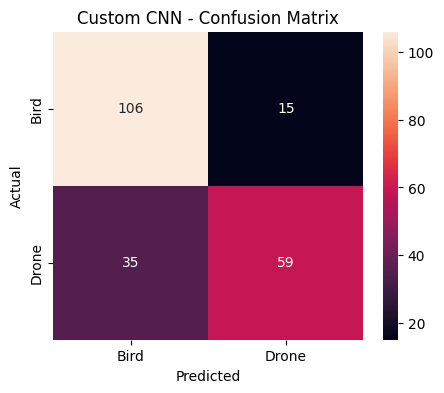


 Evaluation Results for: ResNet50 Transfer Learning
--------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 721ms/step
              precision    recall  f1-score   support

        Bird       0.80      0.84      0.82       121
       Drone       0.78      0.73      0.76        94

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.79      0.80      0.79       215



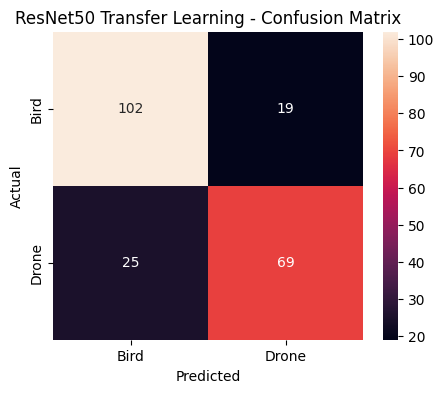


 Evaluation Results for: MobileNet Transfer Learning
--------------------------------------------------


7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
              precision    recall  f1-score   support

        Bird       0.98      0.95      0.97       121
       Drone       0.94      0.98      0.96        94

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



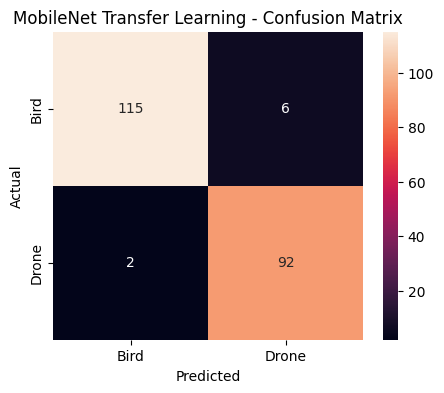


 Evaluation Results for: EfficientNetB0 Transfer Learning
--------------------------------------------------


7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step
              precision    recall  f1-score   support

        Bird       0.00      0.00      0.00       121
       Drone       0.44      1.00      0.61        94

    accuracy                           0.44       215
   macro avg       0.22      0.50      0.30       215
weighted avg       0.19      0.44      0.27       215



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


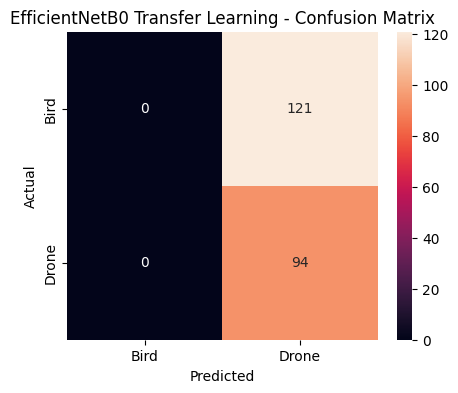

array([[  0, 121],
       [  0,  94]])

In [ ]:
evaluate_model("Custom_model.keras", test_data, "Custom CNN")
evaluate_model("ResNet50.keras", test_data, "ResNet50 Transfer Learning")
evaluate_model("MobileNetV2.keras", test_data, "MobileNet Transfer Learning")
evaluate_model("EfficientNetB0.keras", test_data, "EfficientNetB0 Transfer Learning")

# **Conclusion**

The **AerialGuard AI** – **Intelligent Aerial Object Surveillance Platform** successfully integrates deep learning, transfer learning, and real-time detection to accurately classify and localize aerial objects such as birds and drones. Through comprehensive experimentation and performance evaluation, the system demonstrates high reliability, strong generalization, and real-world applicability in safety-critical airspace monitoring.

For **Image Classification**, four models were developed — Custom CNN, ResNet50, MobileNetV2, and EfficientNetB0.


*   **MobileNetV2** delivered the best performance with an **accuracy of 96%** and balanced
F1-scores for both classes, outperforming ResNet50 (80%) and Custom CNN (77%).

*   The model generalized well with minimal misclassification, making it suitable for real-time deployment in resource-constrained environments.


*   Key improvements came from Transfer Learning, Data Augmentation, and Regularization, helping the model differentiate complex aerial features such as shape, wing patterns, and rotor structures.


For **Object Detection**, YOLOv8 was implemented to enhance real-world surveillance capabilities.


*   YOLOv8 successfully detected and localized both birds and drones in aerial scenes with bounding boxes and confidence scores.

*   This extends the system beyond classification into **spatial awareness**, enabling monitoring, alerting, and tracking in restricted airspace zones.


Overall, the solution provides a robust AI-driven approach to supporting **aviation safety, wildlife protection, and defense surveillance**.

The **MobileNetV2 model** was deployed using **Streamlit**, enabling an interactive platform for field usability and real-time decision support. The modular architecture ensures scalability for future expansion to additional object classes, live drone-camera feeds, and advanced anomaly detection.

Thus, **AerialGuard AI** stands as a scalable, accurate, and practical deep-learning solution that transforms aerial monitoring workflows by improving detection reliability, reducing manual effort, and enhancing situational awareness in sensitive air operations.